### QuickSort
* Select pivot, pivot = random.randint(left, right)
* 把pivot放在end，最后跟border 指针调换
* 把数组里所有小于pivot的数移到pivot左边，用一个border指针来区分左边小于它，右边都大于它
* swap， （border， pivot）
* 对pivot左右两个数组分别递归快速排序

In [ ]:
# 912. Sort an Array
class Solution:
    def sortArray(self, nums: List[int]) -> List[int]:
        # quick sort
        if not nums or len(nums) <= 1: return nums
        def partition(start, end):
            rand = random.randint(start, end)
            pivot = end
            nums[rand], nums[pivot] = nums[pivot], nums[rand]
            border = start
            for cur in range(start, end):
                # 把数组里所有小于pivot的数移到pivot左边，用一个border指针来区分左边小于它，右边都大于它
                if nums[cur] <= nums[pivot]:
                    nums[cur], nums[border] = nums[border], nums[cur]
                    border += 1
            nums[border], nums[pivot] = nums[pivot], nums[border]
            return border
        
        def quick_sort(left, right):
            if left >= right: return
            p = partition(left, right)
            quick_sort(left, p - 1)
            quick_sort(p + 1, right)
        quick_sort(0, len(nums) - 1)
        return nums

In [ ]:
# 347. Top K Frequent Elements
class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        # quick sort
        counter = Counter(nums)
        key_list = list(counter.keys())
        def partition(left, right):
            rand = random.randint(left, right)
            # move rand (pivot) to the right
            pivot = right
            key_list[rand], key_list[pivot] = key_list[pivot], key_list[rand]
            border = left
            for cur in range(left, right):
                if counter[key_list[cur]] >= counter[key_list[pivot]]:
                    key_list[border], key_list[cur] = key_list[cur], key_list[border]
                    border += 1
            key_list[border], key_list[pivot] = key_list[pivot], key_list[border]
            return border          
        
        def quick_sort(left, right, k):
            if left >= right: return
            p = partition(left, right)
            if p > k - 1:
                quick_sort(left, p - 1, k)
            elif p < k - 1:
                quick_sort(p + 1, right, k - p)
            else: return
            
        quick_sort(0, len(key_list) - 1, k)
        return key_list[:k]

### MergeSort
建立在归并操作上的一种有效排序算法，采用的是Divide and Conquer
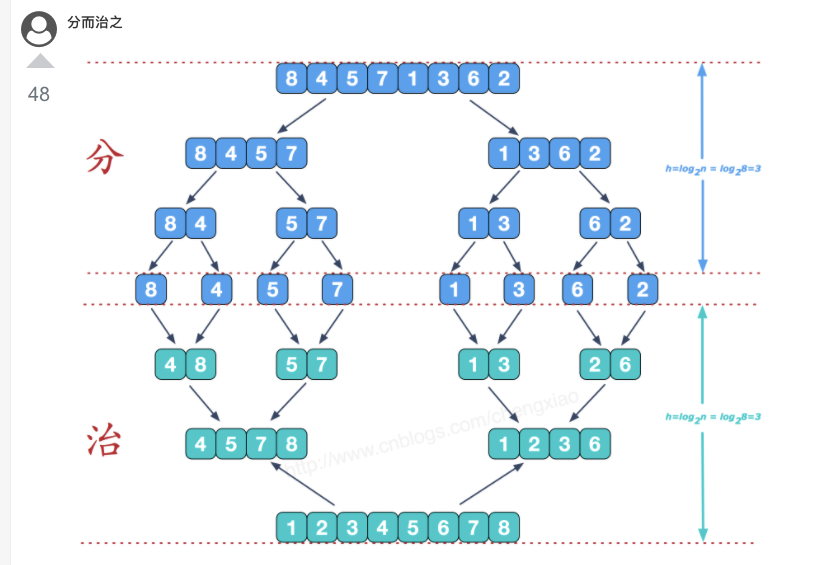



In [ ]:
912. Sort an Array
class Solution:
    def sortArray(self, nums: List[int]) -> List[int]:
        # merge sort top down
        if len(nums)<= 1: return nums
        pivot = int(len(nums) / 2)
        left_list = self.sortArray(nums[0:pivot])
        right_list = self.sortArray(nums[pivot:])
        return self.merge(left_list, right_list)
    
    def merge(self, left_list, right_list):
        if not left_list: return right_list
        if not right_list: return left_list
        res = []
        left, right = 0, 0
        while left < len(left_list) and right < len(right_list):
            if left_list[left] <= right_list[right]:
                res.append(left_list[left])
                left += 1
            else:
                res.append(right_list[right])
                right += 1
        res.extend(left_list[left:])
        res.extend(right_list[right:])
        return res